#Sampling 


For this file, I'd like to apply the topics of  undersampling, oversampling and SMOTE to a toy dataset to see if I get better performance by using these sampling methods. In my experience, sampling helps sometimes but not all times. 

In [ ]:
import pandas as pd
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


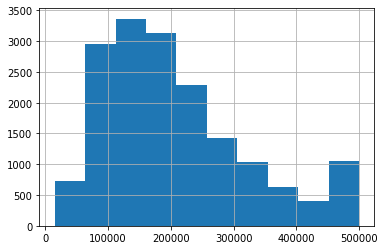

In [ ]:
import matplotlib.pyplot as plt

df['median_house_value'].hist()
plt.show()

In [ ]:
# create a new target variable for SMOTE
import numpy as np

# nice imbalanced data!
df['median_house_value'] = np.where(df['median_house_value'] < 380000, 1, 0)
df['median_house_value'].value_counts()

1    15304
0     1696
Name: median_house_value, dtype: int64

# Split data into train and test 


In [ ]:
import pandas as pd
import numpy as np
from collections import Counter

In [ ]:
y = df['median_house_value']
y

0        1
1        1
2        1
3        1
4        1
        ..
16995    1
16996    1
16997    1
16998    1
16999    1
Name: median_house_value, Length: 17000, dtype: int64

In [ ]:
X = df.drop('median_house_value', axis=1)
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250
...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797


In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(13600, 8) (3400, 8)
(13600,) (3400,)


Let's look at the class distribution in y_train and y_test.

In [ ]:
# train 
Counter(y_train)

Counter({1: 12254, 0: 1346})

In [ ]:
# test
Counter(y_test)

Counter({1: 3050, 0: 350})

# Majority Undersampling
Perform majority undersampling and evaluate model performance (using confusion matrices, classifcation report) 

In [ ]:
# use imblearn to perform majority undersampling on X_train, evaluate on test partition

In [ ]:
# importing libraries for random undersampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X_train, y_train)
# summarize class distribution
print(Counter(y_under))

Counter({0: 1346, 1: 1346})


#Fitting a model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#fitting the model

clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_under,y_under)
train_preds = clf.predict(X_under) # store the predictions
test_preds = clf.predict(X_test) # store the predictions


In [ ]:
#Evaluating the Model

# classification error metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Creating confusion matrix
confusion_matrix(y_true=y_under, y_pred= train_preds) #train confusion matrix

array([[1346,    0],
       [   0, 1346]])

In [ ]:
confusion_matrix(y_true=y_test, y_pred= test_preds) #test confusion matrix

array([[ 310,   40],
       [ 394, 2656]])

In [ ]:
print(classification_report(y_true=y_test, y_pred= test_preds)) #test report

              precision    recall  f1-score   support

           0       0.44      0.89      0.59       350
           1       0.99      0.87      0.92      3050

    accuracy                           0.87      3400
   macro avg       0.71      0.88      0.76      3400
weighted avg       0.93      0.87      0.89      3400



With the classification matrix for undersampling, I can see that my accuracy is 87%. Also I can see that the model has good pretty good job since we got 2656 true positives and 394 false negatives out of 3400 test data

#  Minority Oversampling
Perform minority oversampling and evaluate model performance (using confusion matrices, classifcation report)

In [ ]:
# use imblearn to perform minority oversampling on X_train, evaluate on test partition

In [ ]:
# importing libraries for random oversampling to balance the class distribution
from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)
# summarize class distribution
print(Counter(y_over))


Counter({1: 12254, 0: 12254})


In [ ]:
from sklearn.ensemble import RandomForestClassifier

#fitting the model

clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_over,y_over)
train_preds = clf.predict(X_over) # store the predictions
test_preds = clf.predict(X_test) # store the predictions


In [ ]:
#Evaluating the Model

# classification error metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Creating confusion matrix
confusion_matrix(y_true=y_over, y_pred= train_preds) #train confusion matrix


array([[12254,     0],
       [    0, 12254]])

In [ ]:
confusion_matrix(y_true=y_test, y_pred= test_preds) #test confusion matrix

array([[ 234,  116],
       [  61, 2989]])

In [ ]:
print(classification_report(y_true=y_test, y_pred= test_preds)) #test report

              precision    recall  f1-score   support

           0       0.79      0.67      0.73       350
           1       0.96      0.98      0.97      3050

    accuracy                           0.95      3400
   macro avg       0.88      0.82      0.85      3400
weighted avg       0.95      0.95      0.95      3400



With the classification matrix for oversampling, I can see that my accuracy is 95%. Also I can see that the model has good pretty good job since we got 2989 true positives and 61 false negatives out of 3400 test data, which is much better than undersampling.

# SMOTE
Perform synthetic minority oversampling and evaluate model performance (using confusion matrices, classifcation report)

In [ ]:
# use imblearn to perform synthetic minority data on X_train, evaluate on test partition

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train) # only for numeric!
Counter(y_res)

Counter({1: 12254, 0: 12254})

In [ ]:
#from sklearn.tree import DecisionTreeclassifier
from sklearn.ensemble import RandomForestClassifier

#fitting the model

clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_res,y_res)
train_preds = clf.predict(X_res) # store the predictions
test_preds = clf.predict(X_test) # store the predictions


In [ ]:
#Evaluating the Model

# classification error metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Creating confusion matrix
confusion_matrix(y_true=y_res, y_pred= train_preds) #train confusion matrix


array([[12254,     0],
       [    0, 12254]])

In [ ]:
confusion_matrix(y_true=y_test, y_pred= test_preds) #test confusion matrix

array([[ 274,   76],
       [ 171, 2879]])

In [ ]:
print(classification_report(y_true=y_test, y_pred= test_preds)) #test report

              precision    recall  f1-score   support

           0       0.62      0.78      0.69       350
           1       0.97      0.94      0.96      3050

    accuracy                           0.93      3400
   macro avg       0.80      0.86      0.82      3400
weighted avg       0.94      0.93      0.93      3400



With the classification matrix for SMOTE, I can see that my accuracy is 93%. Also I can see that the model has good pretty good job since we got 2879 true positives and 171 false negatives out of 3400 test data.
False negatives are greater for SMOTE compared to oversampling and less compared to undersampling

# omparison of 3 methods

Out of the three models, I found oversampling makes the best model since it got the best accuracy as 95% compared to undersampling and SMOTE as 87% and 93% respectively.
Moreover, in our business case the most important factor is False negative which means we predicated it as negative but actually it was positive.(Therefore, we need to minimize false neagtives) The metric which deals with it is recall and hence recall is the most significant metric to be considered. So considering recall among all the models also, we find oversampling has the highest recall compared to undersampling and SMOTE. 
Aslo, oversampling has the lowest number of false negatives so its the best model among all


# Reproducibility - running it 30 times or more!



In [ ]:
#importing libraries

from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
from numpy.random import random_sample
#Now I choose to run SMOTE 30 times

range = np.arange(0,30,1)

accuracy_list=[] #empty cells to save result
precision_list = [] #empty cells to save result
recall_list = [] #empty cells to save result

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train) # only for numeric!
Counter(y_res)


for i in range:
  sm = SMOTE(random_state=i)
  X_res, y_res= sm.fit_resample(X_train, y_train) # only for numeric!
  Counter(y_res)

  #fitting the model
  clf = RandomForestClassifier(n_estimators=200)
  clf.fit(X_res,y_res)
  train_preds = clf.predict(X_res) # store the predictions 
  test_preds = clf.predict(X_test) # store the predictions

  #Creating accuracy, precision and recall
  accuracy = accuracy_score(y_test, test_preds)
  precision = precision_score(y_test, test_preds)
  recall = recall_score(y_test, test_preds)

  #Saving the results
  accuracy_list.append([i, accuracy])
  precision_list.append([i, precision])
  recall_list.append([i, recall])
 

In [ ]:
print("Accuracy is:", accuracy)
print("Precision is:", precision)
print("Recall is:", recall)

Accuracy is: 0.9291176470588235
Precision is: 0.9740128248396895
Recall is: 0.9462295081967214


In [ ]:
from numpy.random import random_sample
#Now I choose to run SMOTE 30 times

range = np.arange(0,40,1)

accuracy_list=[] #empty cells to save result
precision_list = [] #empty cells to save result
recall_list = [] #empty cells to save result

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train) # only for numeric!
Counter(y_res)


for i in range:
  sm = SMOTE(random_state=i)
  X_res, y_res= sm.fit_resample(X_train, y_train) # only for numeric!
  Counter(y_res)

  #fitting the model
  clf = RandomForestClassifier(n_estimators=200)
  clf.fit(X_res,y_res)
  train_preds = clf.predict(X_res) # store the predictions 
  test_preds = clf.predict(X_test) # store the predictions

  #Creating accuracy, precision and recall
  accuracy = accuracy_score(y_test, test_preds)
  precision = precision_score(y_test, test_preds)
  recall = recall_score(y_test, test_preds)

  #Saving the results
  accuracy_list.append([i, accuracy])
  precision_list.append([i, precision])
  recall_list.append([i, recall])
 

In [ ]:
print("Accuracy is:", accuracy)
print("Precision is:", precision)
print("Recall is:", recall)

Accuracy is: 0.9302941176470588
Precision is: 0.9756509976327359
Recall is: 0.9459016393442623


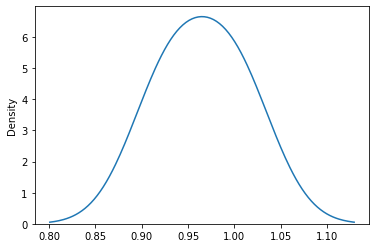

In [ ]:
#plotting accuracy score bell curve distribution
sns.kdeplot(accuracy_list[1])
plt.show()

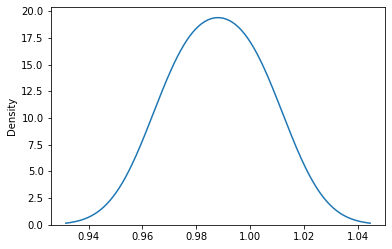

In [ ]:
#plotting precision score bell curve distribution
sns.kdeplot(precision_list[1])
plt.show()

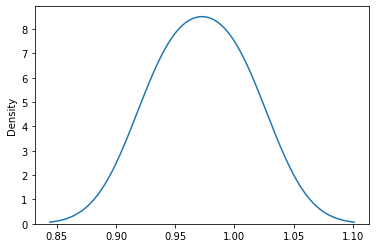

In [ ]:
#plotting recall score bell curve distribution
sns.kdeplot(recall_list[1])
plt.show()

#  Comments on the repeated experiment


If I am repeating the experiment several times with repeated sets of more than 30, I am getting new accuracy everytime. 
Therefore, we can conclude that increasing random sets and repeating experiments will improve the accuracy of my model with more stablility. 
Moreover, more reproducibility, will make our model robust and we will be able to explain our best model to stakeholders in a better way with more number of experiments.
